In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, Conv1D, MaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding, GRU
import tensorflow as tf
from mlutils import plot

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('subjects-questions.csv') 

In [4]:
df.head()

,eng,Subject
0,An anti-forest measure is\nA. Afforestation\nB...,Biology
1,"Among the following organic acids, the acid pr...",Chemistry
2,If the area of two similar triangles are equal...,Maths
3,"In recent year, there has been a growing\nconc...",Biology
4,Which of the following statement\nregarding tr...,Physics


In [5]:
df['ca_labels'] = df['Subject'].map({'Biology':0, 'Chemistry':1, 'Maths':2, 'Physics':3})

In [6]:
y = df['ca_labels'].values

In [7]:
y.shape

(122519,)

In [8]:
x = df['eng'].values

In [9]:
for i in range(len(x)):
    x[i] = x[i].replace('\n', ' ')

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.33, shuffle=True)

In [11]:
vocab_size = 1000
oov_token = '<oov>'
trunc='post'
maxlen = 50
embedded_dim = 8

In [12]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)

In [13]:
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

In [14]:
word_index

{'<oov>': 1,
 'the': 2,
 'a': 3,
 'of': 4,
 '2': 5,
 'c': 6,
 'is': 7,
 'b': 8,
 'd': 9,
 'boldsymbol': 10,
 '1': 11,
 'and': 12,
 '3': 13,
 'x': 14,
 'in': 15,
 'frac': 16,
 'mathrm': 17,
 'cdot': 18,
 '0': 19,
 'mathbf': 20,
 '4': 21,
 'h': 22,
 'm': 23,
 'to': 24,
 'o': 25,
 'n': 26,
 'are': 27,
 '5': 28,
 's': 29,
 'right': 30,
 'i': 31,
 'left': 32,
 'r': 33,
 'p': 34,
 '10': 35,
 'correct': 36,
 'at': 37,
 'e': 38,
 'y': 39,
 'l': 40,
 'which': 41,
 'g': 42,
 '6': 43,
 'if': 44,
 'k': 45,
 'f': 46,
 'for': 47,
 'with': 48,
 'reason': 49,
 'assertion': 50,
 'by': 51,
 'following': 52,
 't': 53,
 'в': 54,
 'v': 55,
 'be': 56,
 'an': 57,
 'times': 58,
 'then': 59,
 'on': 60,
 'from': 61,
 'sqrt': 62,
 '8': 63,
 'that': 64,
 'both': 65,
 'find': 66,
 'q': 67,
 '7': 68,
 'circ': 69,
 'pi': 70,
 'as': 71,
 'it': 72,
 'cm': 73,
 'not': 74,
 'two': 75,
 'has': 76,
 'what': 77,
 'will': 78,
 'true': 79,
 'but': 80,
 'none': 81,
 'its': 82,
 'array': 83,
 'one': 84,
 'z': 85,
 '9': 86,
 'n

In [15]:
sequences = tokenizer.texts_to_sequences(x_train)

In [16]:
len(word_index)

36226

In [17]:
padded = pad_sequences(sequences, maxlen=maxlen, truncating=trunc)

In [18]:
padded.shape

(82087, 50)

In [19]:
testing_sequence = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(testing_sequence, maxlen=maxlen)

In [20]:
test_padded.shape

(40432, 50)

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedded_dim,input_length=maxlen),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [22]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='adam')

In [23]:
hist = model.fit(padded,y_train,batch_size=64, epochs=10, validation_data=(test_padded,y_test), validation_batch_size=64)

Epoch 1/10
1283/1283 [==============================] - 4s 3ms/step - loss: 0.6432 - acc: 0.7682 - val_loss: 0.4587 - val_acc: 0.8295
Epoch 2/10
1283/1283 [==============================] - 4s 3ms/step - loss: 0.3620 - acc: 0.8682 - val_loss: 0.4103 - val_acc: 0.8448
Epoch 3/10
1283/1283 [==============================] - 4s 3ms/step - loss: 0.3252 - acc: 0.8793 - val_loss: 0.3951 - val_acc: 0.8521
Epoch 4/10
1283/1283 [==============================] - 4s 3ms/step - loss: 0.3098 - acc: 0.8853 - val_loss: 0.3947 - val_acc: 0.8521
Epoch 5/10
1283/1283 [==============================] - 4s 3ms/step - loss: 0.3001 - acc: 0.8887 - val_loss: 0.3907 - val_acc: 0.8547
Epoch 6/10
1283/1283 [==============================] - 4s 3ms/step - loss: 0.2934 - acc: 0.8906 - val_loss: 0.3876 - val_acc: 0.8557
Epoch 7/10
1283/1283 [==============================] - 4s 3ms/step - loss: 0.2884 - acc: 0.8926 - val_loss: 0.3884 - val_acc: 0.8569
Epoch 8/10
1283/1283 [==============================] - 4s 3ms

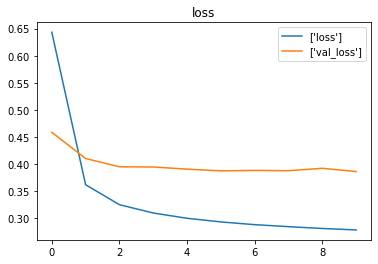

In [26]:
plot(hist)

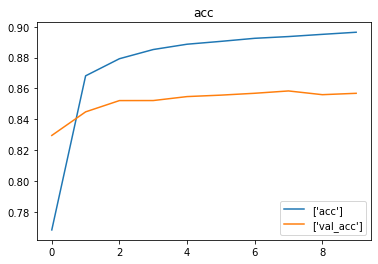

In [27]:
plot(hist, 'acc')

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedded_dim,input_length=maxlen),
    tf.keras.layers.LSTM(15, return_sequences=True),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [29]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='adam')

In [30]:
hist = model.fit(padded,y_train,batch_size=64, epochs=10, validation_data=(test_padded,y_test), validation_batch_size=64)

Epoch 1/10
1283/1283 [==============================] - 11s 9ms/step - loss: 0.5954 - acc: 0.7615 - val_loss: 0.4426 - val_acc: 0.8373
Epoch 2/10
1283/1283 [==============================] - 11s 8ms/step - loss: 0.3362 - acc: 0.8771 - val_loss: 0.3899 - val_acc: 0.8556
Epoch 3/10
1283/1283 [==============================] - 11s 8ms/step - loss: 0.3104 - acc: 0.8846 - val_loss: 0.3807 - val_acc: 0.8576
Epoch 4/10
1283/1283 [==============================] - 11s 8ms/step - loss: 0.2998 - acc: 0.8880 - val_loss: 0.3818 - val_acc: 0.8593
Epoch 5/10
1283/1283 [==============================] - 11s 8ms/step - loss: 0.2920 - acc: 0.8909 - val_loss: 0.3961 - val_acc: 0.8514
Epoch 6/10
1283/1283 [==============================] - 11s 8ms/step - loss: 0.2868 - acc: 0.8911 - val_loss: 0.3646 - val_acc: 0.8648
Epoch 7/10
1283/1283 [==============================] - 11s 8ms/step - loss: 0.2828 - acc: 0.8928 - val_loss: 0.3650 - val_acc: 0.8644
Epoch 8/10
1283/1283 [==============================] -

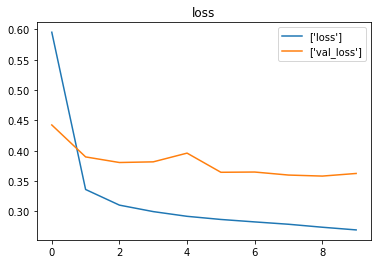

In [31]:
plot(hist)

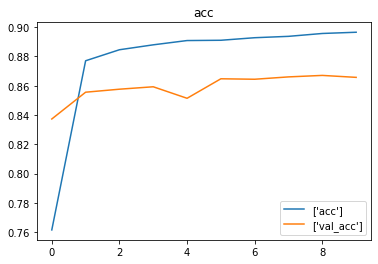

In [32]:
plot(hist, 'acc')

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedded_dim,input_length=maxlen),
    tf.keras.layers.Bidirectional(LSTM(15, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [39]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='adam')

In [40]:
hist = model.fit(padded,y_train,batch_size=64, epochs=10, validation_data=(test_padded,y_test), validation_batch_size=64)

Epoch 1/10
1283/1283 [==============================] - 17s 13ms/step - loss: 0.5287 - acc: 0.7947 - val_loss: 0.4190 - val_acc: 0.8482
Epoch 2/10
1283/1283 [==============================] - 17s 13ms/step - loss: 0.3286 - acc: 0.8794 - val_loss: 0.3848 - val_acc: 0.8566
Epoch 3/10
1283/1283 [==============================] - 17s 13ms/step - loss: 0.3067 - acc: 0.8844 - val_loss: 0.3826 - val_acc: 0.8582
Epoch 4/10
1283/1283 [==============================] - 16s 13ms/step - loss: 0.2961 - acc: 0.8888 - val_loss: 0.3901 - val_acc: 0.8599
Epoch 5/10
1283/1283 [==============================] - 17s 13ms/step - loss: 0.2877 - acc: 0.8916 - val_loss: 0.3854 - val_acc: 0.8614
Epoch 6/10
1283/1283 [==============================] - 17s 13ms/step - loss: 0.2808 - acc: 0.8934 - val_loss: 0.3749 - val_acc: 0.8616
Epoch 7/10
1283/1283 [==============================] - 16s 13ms/step - loss: 0.2758 - acc: 0.8955 - val_loss: 0.3608 - val_acc: 0.8654
Epoch 8/10
1283/1283 [==========================

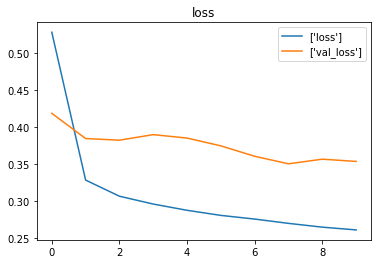

In [41]:
plot(hist)

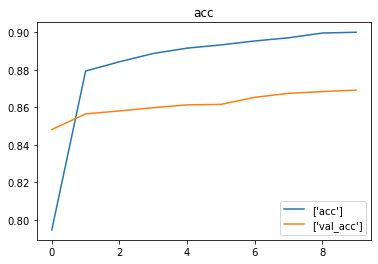

In [42]:
plot(hist, 'acc')

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedded_dim,input_length=maxlen),
    tf.keras.layers.GRU(15, return_sequences=True),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [44]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='adam')

In [45]:
hist = model.fit(padded,y_train,batch_size=64, epochs=10, validation_data=(test_padded,y_test), validation_batch_size=64)

Epoch 1/10
1283/1283 [==============================] - 11s 9ms/step - loss: 0.5603 - acc: 0.7734 - val_loss: 0.4554 - val_acc: 0.8313
Epoch 2/10
1283/1283 [==============================] - 11s 8ms/step - loss: 0.3439 - acc: 0.8729 - val_loss: 0.3950 - val_acc: 0.8513
Epoch 3/10
1283/1283 [==============================] - 11s 8ms/step - loss: 0.3156 - acc: 0.8826 - val_loss: 0.3766 - val_acc: 0.8588
Epoch 4/10
1283/1283 [==============================] - 11s 8ms/step - loss: 0.2988 - acc: 0.8886 - val_loss: 0.3752 - val_acc: 0.8605
Epoch 5/10
1283/1283 [==============================] - 11s 8ms/step - loss: 0.2873 - acc: 0.8924 - val_loss: 0.3723 - val_acc: 0.8637
Epoch 6/10
1283/1283 [==============================] - 11s 9ms/step - loss: 0.2801 - acc: 0.8944 - val_loss: 0.3617 - val_acc: 0.8649
Epoch 7/10
1283/1283 [==============================] - 9s 7ms/step - loss: 0.2736 - acc: 0.8965 - val_loss: 0.3657 - val_acc: 0.8638
Epoch 8/10
1283/1283 [==============================] - 

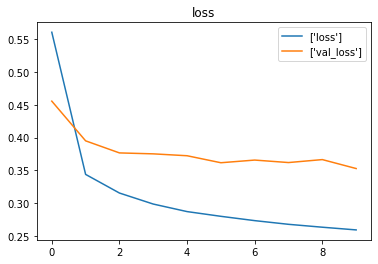

In [46]:
plot(hist)

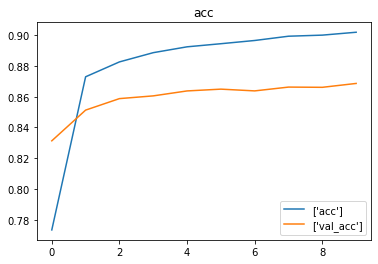

In [47]:
plot(hist, 'acc')

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedded_dim,input_length=maxlen),
    tf.keras.layers.Bidirectional(GRU(15, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [50]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='adam')

In [51]:
hist = model.fit(padded,y_train,batch_size=64, epochs=10, validation_data=(test_padded,y_test), validation_batch_size=64)

Epoch 1/10
1283/1283 [==============================] - 11s 9ms/step - loss: 0.5247 - acc: 0.7971 - val_loss: 0.3935 - val_acc: 0.8553
Epoch 2/10
1283/1283 [==============================] - 10s 8ms/step - loss: 0.3162 - acc: 0.8838 - val_loss: 0.3675 - val_acc: 0.8629
Epoch 3/10
1283/1283 [==============================] - 11s 8ms/step - loss: 0.2950 - acc: 0.8899 - val_loss: 0.3633 - val_acc: 0.8660
Epoch 4/10
1283/1283 [==============================] - 10s 8ms/step - loss: 0.2834 - acc: 0.8937 - val_loss: 0.3672 - val_acc: 0.8673
Epoch 5/10
1283/1283 [==============================] - 10s 8ms/step - loss: 0.2752 - acc: 0.8961 - val_loss: 0.3676 - val_acc: 0.8676
Epoch 6/10
1283/1283 [==============================] - 10s 8ms/step - loss: 0.2690 - acc: 0.8975 - val_loss: 0.3602 - val_acc: 0.8685
Epoch 7/10
1283/1283 [==============================] - 10s 8ms/step - loss: 0.2636 - acc: 0.8995 - val_loss: 0.3566 - val_acc: 0.8688
Epoch 8/10
1283/1283 [==============================] -

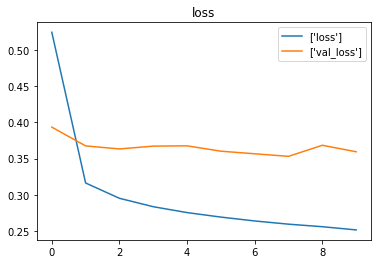

In [52]:
plot(hist)

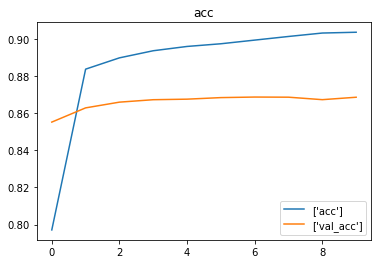

In [53]:
plot(hist, 'acc')

In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedded_dim,input_length=maxlen),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [57]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='adam')

In [58]:
hist = model.fit(padded,y_train,batch_size=64, epochs=10, validation_data=(test_padded,y_test), validation_batch_size=64)

Epoch 1/10
1283/1283 [==============================] - 5s 4ms/step - loss: 0.5478 - acc: 0.7904 - val_loss: 0.4357 - val_acc: 0.8451
Epoch 2/10
1283/1283 [==============================] - 5s 4ms/step - loss: 0.3392 - acc: 0.8751 - val_loss: 0.3964 - val_acc: 0.8563
Epoch 3/10
1283/1283 [==============================] - 5s 4ms/step - loss: 0.3136 - acc: 0.8829 - val_loss: 0.3853 - val_acc: 0.8590
Epoch 4/10
1283/1283 [==============================] - 5s 4ms/step - loss: 0.3017 - acc: 0.8869 - val_loss: 0.3877 - val_acc: 0.8581
Epoch 5/10
1283/1283 [==============================] - 5s 4ms/step - loss: 0.2948 - acc: 0.8883 - val_loss: 0.3842 - val_acc: 0.8604
Epoch 6/10
1283/1283 [==============================] - 5s 4ms/step - loss: 0.2893 - acc: 0.8896 - val_loss: 0.3779 - val_acc: 0.8632
Epoch 7/10
1283/1283 [==============================] - 5s 4ms/step - loss: 0.2853 - acc: 0.8920 - val_loss: 0.3801 - val_acc: 0.8632
Epoch 8/10
1283/1283 [==============================] - 5s 4ms

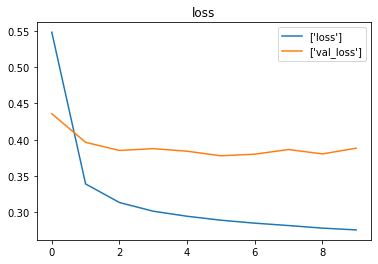

In [59]:
plot(hist)

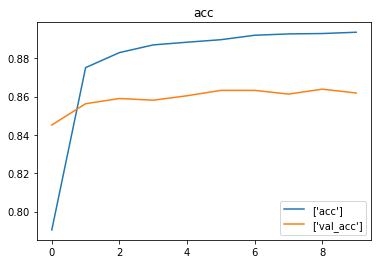

In [60]:
plot(hist, 'acc')

In [62]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedded_dim,input_length=maxlen),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [63]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='adam')

In [64]:
hist = model.fit(padded,y_train,batch_size=64, epochs=10, validation_data=(test_padded,y_test), validation_batch_size=64)

Epoch 1/10
1283/1283 [==============================] - 5s 4ms/step - loss: 0.5199 - acc: 0.7924 - val_loss: 0.3905 - val_acc: 0.8549
Epoch 2/10
1283/1283 [==============================] - 5s 4ms/step - loss: 0.3122 - acc: 0.8847 - val_loss: 0.3742 - val_acc: 0.8605
Epoch 3/10
1283/1283 [==============================] - 5s 4ms/step - loss: 0.2881 - acc: 0.8924 - val_loss: 0.3664 - val_acc: 0.8639
Epoch 4/10
1283/1283 [==============================] - 5s 4ms/step - loss: 0.2750 - acc: 0.8964 - val_loss: 0.3611 - val_acc: 0.8669
Epoch 5/10
1283/1283 [==============================] - 5s 4ms/step - loss: 0.2644 - acc: 0.9012 - val_loss: 0.3583 - val_acc: 0.8664
Epoch 6/10
1283/1283 [==============================] - 5s 4ms/step - loss: 0.2564 - acc: 0.9038 - val_loss: 0.3628 - val_acc: 0.8674
Epoch 7/10
1283/1283 [==============================] - 5s 4ms/step - loss: 0.2497 - acc: 0.9062 - val_loss: 0.3590 - val_acc: 0.8695
Epoch 8/10
1283/1283 [==============================] - 5s 4ms

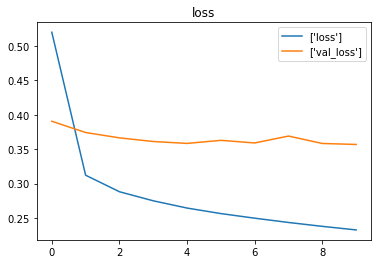

In [65]:
plot(hist)

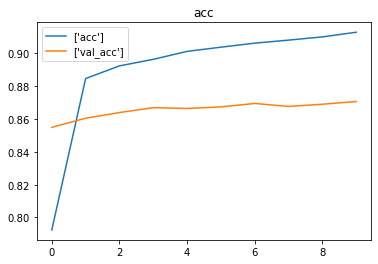

In [66]:
plot(hist, 'acc')

In [79]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedded_dim,input_length=maxlen),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation='relu', activity_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation='relu', activity_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [80]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='adam')

In [81]:
hist = model.fit(padded,y_train,batch_size=64, epochs=50, validation_data=(test_padded,y_test), validation_batch_size=64)

Epoch 1/50
1283/1283 [==============================] - 6s 4ms/step - loss: 0.5836 - acc: 0.7900 - val_loss: 0.4426 - val_acc: 0.8501
Epoch 2/50
1283/1283 [==============================] - 5s 4ms/step - loss: 0.3816 - acc: 0.8727 - val_loss: 0.4035 - val_acc: 0.8604
Epoch 3/50
1283/1283 [==============================] - 5s 4ms/step - loss: 0.3514 - acc: 0.8798 - val_loss: 0.4030 - val_acc: 0.8565
Epoch 4/50
1283/1283 [==============================] - 5s 4ms/step - loss: 0.3367 - acc: 0.8834 - val_loss: 0.3875 - val_acc: 0.8598
Epoch 5/50
1283/1283 [==============================] - 5s 4ms/step - loss: 0.3253 - acc: 0.8855 - val_loss: 0.3854 - val_acc: 0.8634
Epoch 6/50
1283/1283 [==============================] - 5s 4ms/step - loss: 0.3175 - acc: 0.8882 - val_loss: 0.3852 - val_acc: 0.8641
Epoch 7/50
1283/1283 [==============================] - 5s 4ms/step - loss: 0.3119 - acc: 0.8901 - val_loss: 0.3891 - val_acc: 0.8635
Epoch 8/50
1283/1283 [==============================] - 5s 4ms

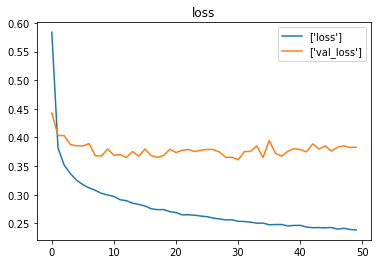

In [82]:
plot(hist)

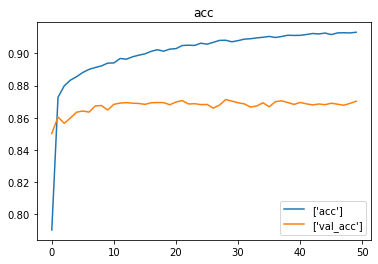

In [83]:
plot(hist, 'acc')